# David Montero Loaiza

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# Introduction to ConvNets: Classifying handwritten numbers


Let's take a look at a simple example of a convnet. We will use it to classify the MNIST dataset, which is an open dataset containing handwritten numbers. 

![Handwritten numbers from the MNIST dataset](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

Let's create a first basic convnet. It's a stack of 'Conv2D' and 'MaxPooling2D' layers. 
The important thing to note is that a convnet takes as input tensors of size `(image_height, image_width, image_channels)`. 
To do this we must first find out the size of the images in our dataset. 

The network must have the following layers:

- A convolutional layer (Conv2D) with 32 3x3 filters and relu activation. In this first layer you must indicate the size of the input (input_shape).
- A second layer of Max Pooling (MaxPooling2D) of 2x2
- A third convolutional layer with 64 3x3 filters and light activation
- A fourth layer of 2x2 Max Pooling (MaxPooling2D)
- A fifth convolutional layer of 64 3x3 filters and light activation

You'll know you've done it right when the model.summary() output is:

![imagen_output.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output.png?raw=true)


In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


You can see above that the output of each Conv2D and MaxPooling2D layer is a 3D tensor of dimensions (height, width, channels). The width and height tend to decrease as we go deeper into the network. The number of channels is controlled by the first argument passed to the Conv2D layers (e.g. 32 or 64).

The next step would be to give our last tensor (of dimensions (3, 3, 64)) as input to a densely connected network. These classifiers process vectors, which are 1D, while our output is a 3D tensor. So first we will have to flatten our 3D output and convert it to 1D and then add a few dense layers:

- First flatten the output.
- Add a first layer of 64 neurons and relu activation
- Add a last layer of 10 neurons (as many as you can sort) and software activation
- You'll know you've done well when the summary looks like this:

![imagen_output_flat.png](https://github.com/laramaktub/MachineLearningI/blob/master/imagen_output_flat.png?raw=true)

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

As you can see, our dimensional output `(3, 3, 64)` has been flattened into a vector of dimension `(576,)`, before entering the two dense layers.

We are now going to train our network with the images from the MNIST dataset.

We then load the dataset and put it into vectors: train_images, train_labels, test_images, test_labels

Before you continue, print:

- What is the size of the training dataset?
- What does the training dataset look like?
- What do the training labels look like?
- Print the fourth image of the training dataset


In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print("Size of training dataset:",len(train_images))

Size of training dataset: 60000


In [6]:
print("Training Dataset type:",type(train_images))
print("Shape of the training dataset:",train_images.shape)

Training Dataset type: <class 'numpy.ndarray'>
Shape of the training dataset: (60000, 28, 28)


In [7]:
print("Training labels type:",type(train_labels))
train_labels

Training labels type: <class 'numpy.ndarray'>


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

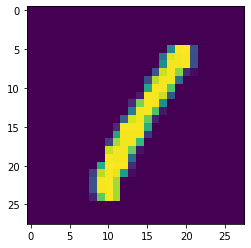

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(train_images[3,:,:])

Next you will give the appropriate shape to the training and test datasets in order to put them into the neural network. Convert the labels, which right now are numbers, into their categorical form.

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels,num_classes = 10, dtype='float32')
test_labels = to_categorical(test_labels,num_classes = 10, dtype='float32')

Compile the model indicating what the training data and its labels are. Using the optimizer "rmsprop" and as a loss function use the categorical cross entropy.
Then train the model for 5 epochs and a batch size of 64.

In [10]:
model.compile(optimizer = "rmsprop",loss = "categorical_crossentropy" , metrics=['accuracy'])
model.fit(train_images,train_labels,batch_size=64,epochs=5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 51s 855us/step - loss: 0.2107 - acc: 0.9343
Epoch 2/5
60000/60000 [==============================] - 51s 847us/step - loss: 0.0691 - acc: 0.9803
Epoch 3/5
60000/60000 [==============================] - 51s 845us/step - loss: 0.0565 - acc: 0.9851
Epoch 4/5
60000/60000 [==============================] - 51s 844us/step - loss: 0.0445 - acc: 0.9881
Epoch 5/5
60000/60000 [==============================] - 51s 845us/step - loss: 0.0417 - acc: 0.9896


Let's evaluate the model with the test images:

In [11]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 260us/step


In [12]:
test_loss

0.04494356992226408

In [13]:
test_acc

0.9896

Create an image with a handwritting number and check the prediction. Try with several numbers ...does it work properly?

In [18]:
from google.colab import drive

drive.mount('/content/drive')

!ls "/content/drive/My Drive/numbers-test"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0.png  1.png  2.png  3.png  4.png  5.png  6.png  7.png	8.png  9.png


In [43]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
import os

img_width=28
img_height=28

images = []
labels = []

folder_path = "/content/drive/My Drive/numbers-test"

for img in os.listdir(folder_path):

  lbl = os.path.splitext(img)[0]
  labels.append(lbl)

  img = os.path.join(folder_path, img)
  img = image.load_img(img, target_size=(img_width, img_height),grayscale=True)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  images.append(img)

images = np.vstack(images)
images = images.astype('float32') / 255

labels = np.array(labels).astype(int)
labels = to_categorical(labels,num_classes=10)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


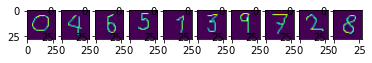

In [50]:
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(images[i,:,:,0])

In [51]:
new_test_loss, new_test_acc = model.evaluate(images,labels)

10/10 [==============================] - 0s 1ms/step


In [52]:
new_test_loss

2.162094831466675

In [53]:
new_test_acc

0.4000000059604645

With new 10 handwritting numbers (from 0 to 9) the model doesn't work very well, reaching a loss of 2.16 and an accuracy of just 0.40.

In [0]:
model.save('/content/drive/My Drive/model/net_numbers.h5')

Load the model that you just saved and make a prediction (predict_classes) with the number you just generated. 


In [0]:
loaded_model = models.load_model('/content/drive/My Drive/model/net_numbers.h5')

In [59]:
loaded_model.predict_classes(images)

array([9, 4, 5, 3, 7, 3, 4, 3, 2, 8])

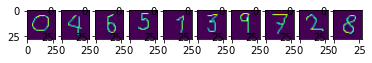

In [60]:
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(images[i,:,:,0])

Correct numbers: [4, 3, 2, 8]